### <font color=blue>01 Overview of the Data</font>
-  <font color=black>Import pandas and sqlite3.</font>
-  <font color=black>Connect to factbook.db and use pandas.read_sql_query() to return information on the tables in the database.</font>
-  <font color=black>Write and run another query that returns the first 5 rows of the only table in the database.</font>

In [1]:
import sqlite3
import pandas as pd

conn = sqlite3.connect('factbook.db')
cursor = conn.cursor()

q = "SELECT * FROM sqlite_master WHERE type='table';"
factbook_table = pd.read_sql_query(q, conn)
print(factbook_table)

    type             name         tbl_name  rootpage  \
0  table            facts            facts         2   
1  table  sqlite_sequence  sqlite_sequence         3   

                                                 sql  
0  CREATE TABLE "facts" ("id" INTEGER PRIMARY KEY...  
1             CREATE TABLE sqlite_sequence(name,seq)  


In [2]:
table_name = factbook_table.loc[0]['tbl_name']
q = "SELECT * FROM {}".format(table_name)
factbook = pd.read_sql_query(q, conn)
print(factbook.head(5))

   id code         name       area  area_land  area_water  population  \
0   1   af  Afghanistan   652230.0   652230.0         0.0  32564342.0   
1   2   al      Albania    28748.0    27398.0      1350.0   3029278.0   
2   3   ag      Algeria  2381741.0  2381741.0         0.0  39542166.0   
3   4   an      Andorra      468.0      468.0         0.0     85580.0   
4   5   ao       Angola  1246700.0  1246700.0         0.0  19625353.0   

   population_growth  birth_rate  death_rate  migration_rate  \
0               2.32       38.57       13.89            1.51   
1               0.30       12.92        6.58            3.30   
2               1.84       23.67        4.31            0.92   
3               0.12        8.13        6.96            0.00   
4               2.78       38.78       11.49            0.46   

                   created_at                  updated_at  
0  2015-11-01 13:19:49.461734  2015-11-01 13:19:49.461734  
1  2015-11-01 13:19:54.431082  2015-11-01 13:19:54.43108

### <font color=blue>02 Summary Statistics</font>
##### <font color=black>Write a single query that returns the following:</font>
-  <font color=black>minimum population</font>
-  <font color=black>maximum population growth</font>
-  <font color=black>minimum population growth</font>
-  <font color=black>maximum population growth</font>

In [3]:
q = "SELECT \
        MIN(population) as min_pop, \
        MAX(population) as max_pop, \
        MIN(population_growth) as min_pop_growth, \
        MAX(population_growth) as max_pop_growth \
    FROM {}".format(table_name)
sum_stats = pd.read_sql_query(q, conn)

print('minimum population:\t\t', sum_stats.loc[0]['min_pop'])
print('maximum population:\t\t', sum_stats.loc[0]['max_pop'])
print('minimum population growth:\t', sum_stats.loc[0]['min_pop_growth'])
print('maximum population growth:\t', sum_stats.loc[0]['max_pop_growth'])

minimum population:		 0.0
maximum population:		 7256490011.0
minimum population growth:	 0.0
maximum population growth:	 4.02


### <font color=blue>03 Exploring Outliers</font>
-  <font color=black>Write a query that returns the countrie(s) with a population of 0.</font>
-  <font color=black>Write a query that returns the countrie(s) with a population of 7256490011.</font>
-  <font color=black>In a markdown cell, type up your observations on these rows.</font>

In [4]:
q = "SELECT name FROM {} WHERE population = 0".format(table_name)
min_population_country = pd.read_sql_query(q, conn)
print('Country with a population of zero:', min_population_country.loc[0]['name'])

Country with a population of zero: Antarctica


In [5]:
q = "SELECT name FROM {} WHERE population = 7256490011".format(table_name)
max_population_country = pd.read_sql_query(q, conn)
print('Country with a population of 7256490011:', max_population_country.loc[0]['name'])

Country with a population of 7256490011: World


##### <font color=black>Antarctica has a population of zero people, and the worlds population is 7256490011.</font>

### <font color=blue>04 Histograms</font>
##### <font color=black>Using just the non-outlier rows, generate a 2 by 2 grid of histograms for the following columns:</font>
-  <font color=black>population</font>
-  <font color=black>population_growth</font>
-  <font color=black>birth_rate</font>
-  <font color=black>death_rate</font>

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2881: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000234ECE4EE48>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x00000234ED133748>]], dtype=object)

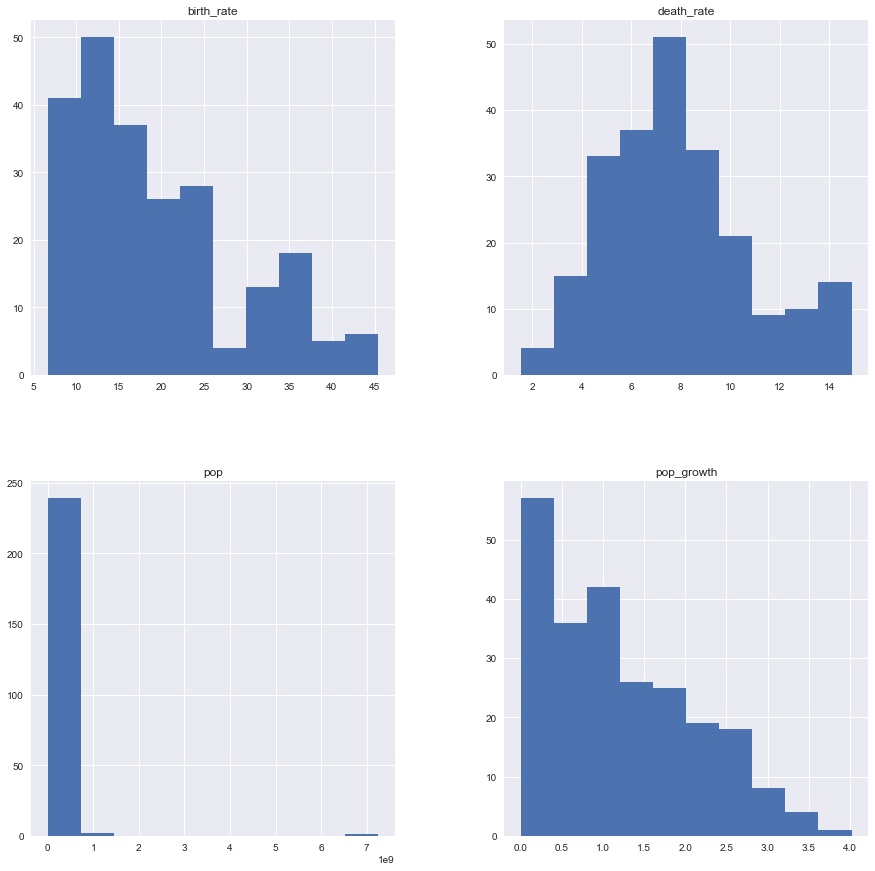

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111)

q = "SELECT \
        population pop, \
        population_growth pop_growth, \
        birth_rate, \
        death_rate \
    FROM {} \
    WHERE \
        pop != 0 or \
        pop != 7256490011".format(table_name)
non_outlier_data = pd.read_sql_query(q, conn)
non_outlier_data.hist(ax=ax)

##### <font color=black>Histograms descriptions:</font>
-  <font color=black>__birth rate:__ The majority of countries on earth have a birth rate 25% or less.  The top three values are 5%, 10%, 15%, each with 42, 50, and 38 countries respectively.  There is a general trend of decreasing countories with increasing birth rate.</font>
-  <font color=black>__death rate:__ The maximum value is approximately the mean with about 52 countries at 8%.  In general the number of countries decreases if your either increase or decrease the death rate from the mean.</font>
-  <font color=black>__population:__ Nearly 250 (almost all) countries have under a billion people. The data would have to be scaled differently to glean better information.  Less than 10 countries have a billion or more people.</font>
-  <font color=black>__Population Growth:__ The majority of countries on earth have a population growth of 2.0% or less.  The top three values are 5%, 10%, 15%, each with 42, 50, and 38 countries respectively.  There is a general trend of decreasing countories with increasing birth rate.</font>

### <font color=blue>05 Next Steps</font>
##### <font color=black>That's it for the guided steps. Here are some next steps for you to explore:</font>

-  <font color=black>Which countries have the highest population density? (Population density is the ratio of population to land area. Compare your results with those from Wikipedia.)</font>
-  <font color=black>Generate a histogram of population densities.</font>
-  <font color=black>Which countries have the highest ratios of water to land?</font>
-  <font color=black>Which countries have more water than land?</font>

Top 10 Countries in population density
         name  population_density
0       Macau        21168.964286
1      Monaco        15267.500000
2   Singapore         8141.279770
3   Hong Kong         6445.041516
4  Gaza Strip         5191.819444
5   Gibraltar         4876.333333
6     Bahrain         1771.859211
7    Maldives         1319.640940
8       Malta         1310.015823
9     Bermuda         1299.925926


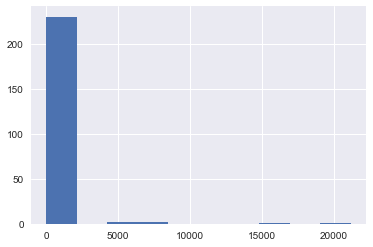

In [7]:
q = "SELECT *, cast(population as float)/cast(area as float) as population_density \
    FROM {} \
    WHERE \
        population != 0 or \
        population != 7256490011 \
    ORDER BY population_density DESC".format(table_name)
population_density_outliers_removed = pd.read_sql_query(q, conn)

print('Top 10 Countries in population density')
print(population_density_outliers_removed[['name', 'population_density']].head(10))

population_density_outliers_removed['population_density'].hist()

In [8]:
factbook_cleaned['water_land_ratio'] = factbook_cleaned['area_water'] / factbook_cleaned['area_land']
factbook_cleaned.sort_values(by=['water_land_ratio'], ascending=False, inplace=True)
# factbook_cleaned.reset_index(inplace=True)

print('The Top 10 Countries for Water/Land Area Ratio')
print(factbook_cleaned[['name', 'water_land_ratio']].head(10))

NameError: name 'factbook_cleaned' is not defined

In [ ]:
q = "SELECT *, cast(area_water as float)/cast(area_land as float) as water_land_ratio FROM {} \
    WHERE \
        area_water > area_land \
    ORDER BY water_land_ratio DESC".format(table_name)
more_water_than_land_outliers_removed = pd.read_sql_query(q, conn)

print('Countries with more water than land')
print(more_water_than_land_outliers_removed[['name','water_land_ratio']])